# --- IS361 AI (RGB Dataset) ---

# Importing Library

In [1]:
# Importing library
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
import itertools
import os

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.decomposition import PCA

# Check library version
print("---Library version---", end = '\n')
print('pandas version: ', pd.__version__)
print('numpy version: ', np.__version__)
print('seaborn version: ', sns.__version__)
print('matplotlib version: ', mpl.__version__, end = '\n\n')

# Setting library
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 122)

mpl.font_manager.fontManager.addfont("C:\\Users\\theer\\Desktop\\Machine Learning\\fonts\\Sarabun-Regular.ttf")
mpl.rc('font', family='Sarabun')
plt.rcParams ['font.family'] = ('Sarabun')

# ignore warnings
warnings.filterwarnings('ignore')


print("---Working Directory---", end = '\n\n')
print('Working Directory: ', os.getcwd(), end='\n')
print('List Directory:', os.listdir(os.getcwd()))

---Library version---
pandas version:  2.2.0
numpy version:  1.26.3
seaborn version:  0.13.1
matplotlib version:  3.8.2

---Working Directory---

Working Directory:  C:\Users\theer\Desktop\Machine Learning\Machine Learning Model\Unsupervised Learning\Principal Component Analysis
List Directory: ['.ipynb_checkpoints', 'Data', 'doc.txt', 'EC477 - meeting.ipynb', 'EC477.ipynb', 'Iris dataset.ipynb', 'IS361 - RGB Dataset.ipynb']


# Loading Data

In [2]:
data = pd.read_csv(filepath_or_buffer = r"C:\Users\theer\Desktop\Machine Learning\Machine Learning Model\Unsupervised Learning\Principal Component Analysis\Data\ASS6IS361Copy of Content.csv")
data.head(10)

,Record,style,red,green,blue
0,1,minimal,192,187,184
1,2,minimal,188,190,187
2,3,minimal,179,174,168
3,4,minimal,190,187,182
4,5,minimal,187,186,182
5,6,minimal,200,189,183
6,7,minimal,190,182,171
7,8,minimal,177,176,174
8,9,minimal,214,207,191
9,10,minimal,208,205,200


# Declear Feature and Traget columns

In [3]:
# Separating features and target variable
X = data.iloc[:, [2,3,4]]  # Features
y = data['style']  # Target variable

# Data Distribution and Overview

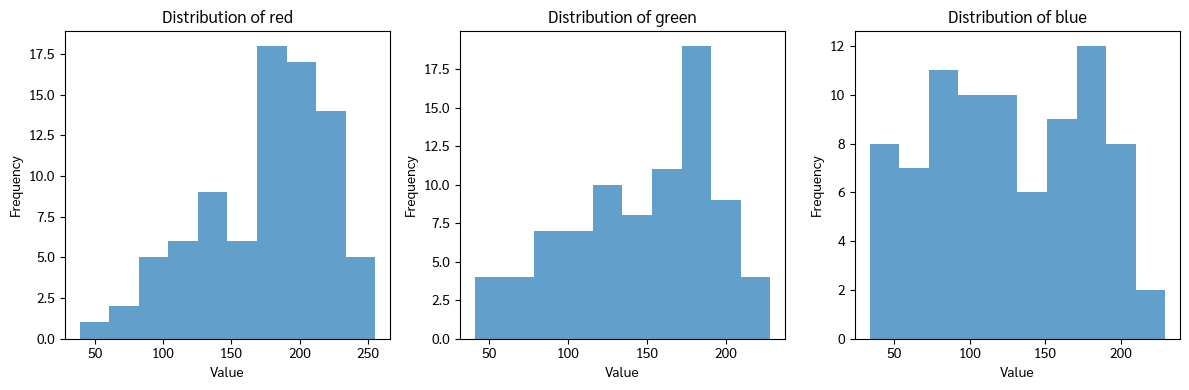

In [4]:
# Set up subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
axes = axes.flatten()

# Plot distribution of each column
for i, column in enumerate(X.columns):
    ax = axes[i]
    ax.hist(data[column], bins=10, alpha=0.7)
    ax.set_title(f'Distribution of {column}')
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

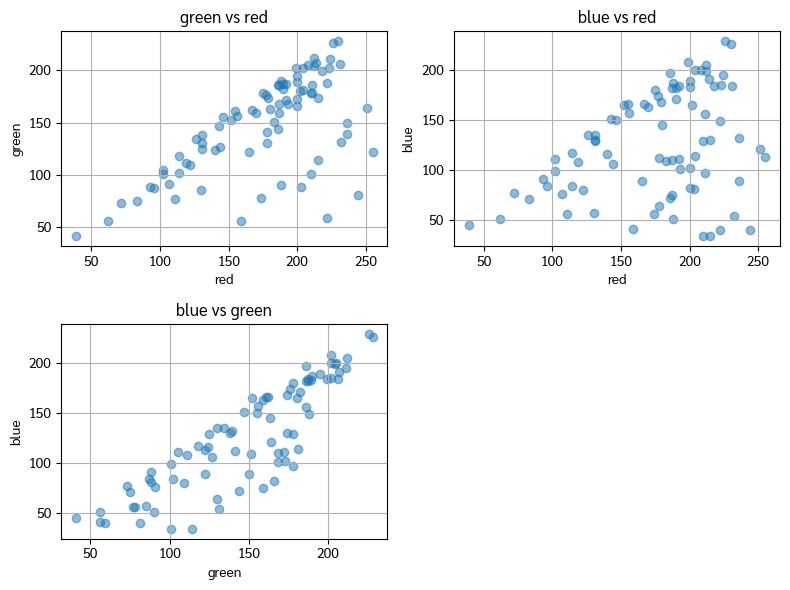

In [5]:
combinations = list(itertools.combinations(X.columns, 2))

# Determine number of rows and columns for subplot layout
num_plots = len(combinations)
num_cols = 2  # Number of columns in subplot layout
num_rows = 2  # Ceiling division to ensure all plots are accommodated

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(8, 6))
axes = axes.flatten()  # Flatten axes to handle both 1D and 2D cases

# Plot each combination
for i, combination in enumerate(combinations):
    x_column, y_column = combination
    ax = axes[i]  # Select current subplot
    ax.scatter(data[x_column], data[y_column], alpha=0.5)
    ax.set_title(f'{y_column} vs {x_column}')
    ax.set_xlabel(x_column)
    ax.set_ylabel(y_column)
    ax.grid(True)

# Hide any unused subplots
for j in range(num_plots, num_cols*num_rows):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

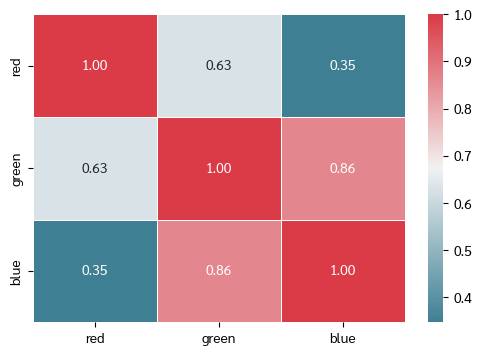

In [6]:
# Select only numeric columns
numeric_data = data.select_dtypes(include='number')

# Calculate correlation
corr = X.corr()

fig, ax = plt.subplots(figsize=(6, 4))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=colormap, linewidths=.5, annot=True, fmt=".2f")
plt.show()


# Developing Model

In [7]:
# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Applying PCA
n_component = 2
pca = PCA(n_components=n_component)
X_pca = pca.fit_transform(X_scaled)

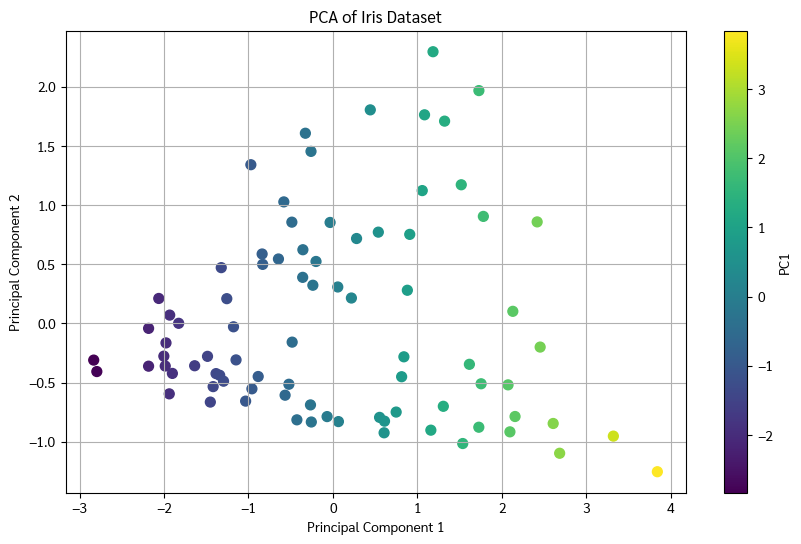

In [8]:
# Creating a DataFrame with PCA results
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['target_names'] = y

# Plotting the graph with colormap
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['PC1'], cmap='viridis', s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Iris Dataset')
plt.colorbar(label='PC1')
plt.grid()
plt.show()

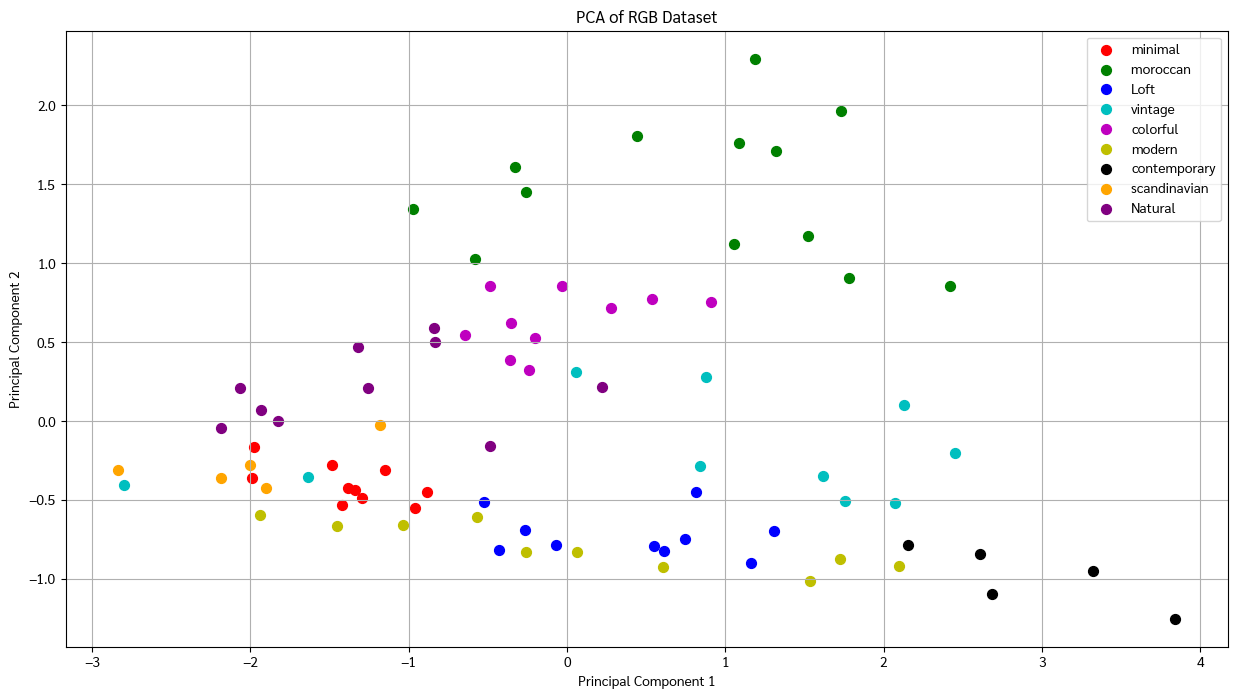

In [9]:
# Creating a DataFrame with PCA results
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['target_names'] = y

# Plotting the graph
plt.figure(figsize=(15, 8))
targets = pca_df['target_names'].unique()
colors = colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'orange', 'purple']   # List of seven colors

for target, color in zip(targets, colors):
    indices_to_keep = pca_df['target_names'] == target
    plt.scatter(pca_df.loc[indices_to_keep, 'PC1'], 
                pca_df.loc[indices_to_keep, 'PC2'], 
                c=color, s=50, label=target)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of RGB Dataset')
plt.legend()
plt.grid()
plt.show()


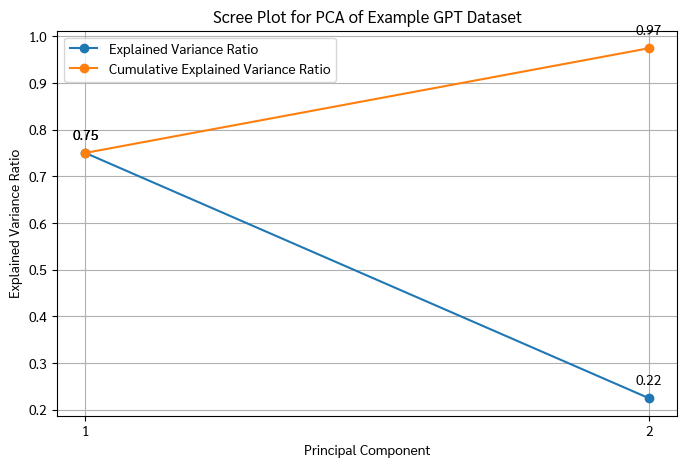

In [10]:
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(8, 5))
plt.plot(np.arange(1, n_component + 1), explained_variance_ratio, marker='o', linestyle='-', label='Explained Variance Ratio')
plt.plot(np.arange(1, n_component + 1), cumulative_variance_ratio, marker='o', linestyle='-', label='Cumulative Explained Variance Ratio')

plt.title('Scree Plot for PCA of Example GPT Dataset')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(np.arange(1, n_component + 1))
plt.legend()
plt.grid(True)

# Annotate each point with its value
for i, (x, y) in enumerate(zip(np.arange(1, n_component + 1), explained_variance_ratio)):
    plt.annotate(f'{explained_variance_ratio[i]:.2f}', (x, y), textcoords="offset points", xytext=(0,10), ha='center')

for i, (x, y) in enumerate(zip(np.arange(1, n_component + 1), cumulative_variance_ratio)):
    plt.annotate(f'{cumulative_variance_ratio[i]:.2f}', (x, y), textcoords="offset points", xytext=(0,10), ha='center')

plt.show()


In [11]:
pca.explained_variance_ratio_

array([0.75023287, 0.22442178])

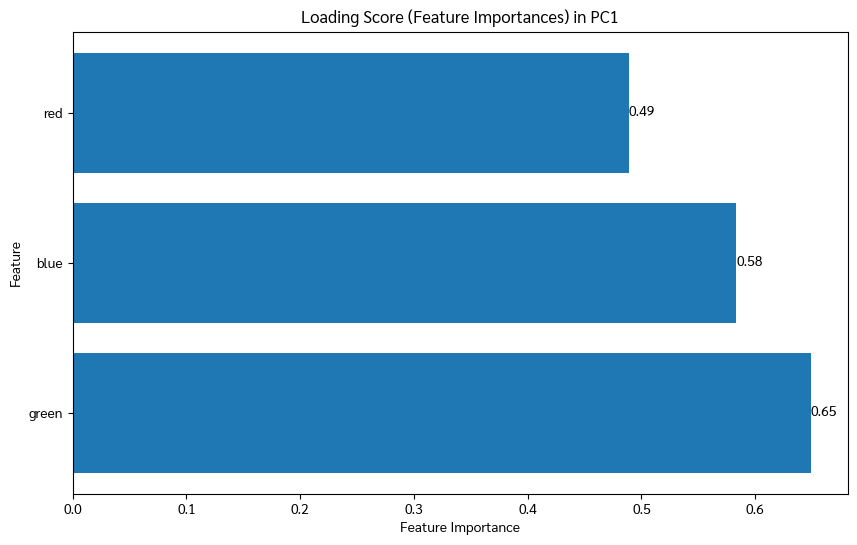

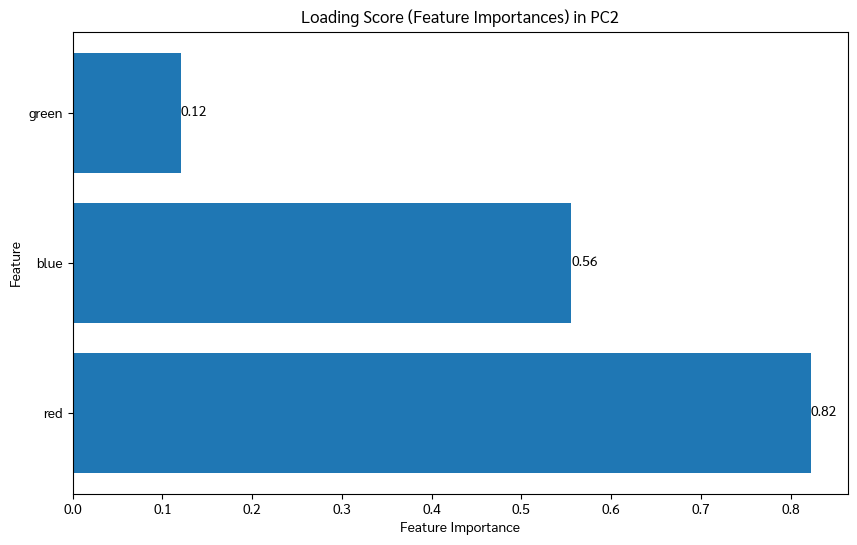

In [12]:
def plot_feature_importances(importances, feature_names, title):
    plt.figure(figsize=(10, 6))
    sorted_idx = importances.argsort()[::-1]
    plt.barh(range(len(importances)), importances[sorted_idx], align='center')
    plt.yticks(range(len(importances)), [feature_names[i] for i in sorted_idx])
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature')
    plt.title(title)
    
    # Annotate each bar with its value
    for i, v in enumerate(importances[sorted_idx]):
        plt.text(v, i, f'{v:.2f}', color='black', ha='left', va='center')
    plt.show()

# Get feature importances (absolute values of PCA components)
feature_importances = np.abs(pca.components_)

# Plot feature importances for each principal component
for i in range(n_component):
    plot_feature_importances(feature_importances[i], X.columns, f'Loading Score (Feature Importances) in PC{i+1}')


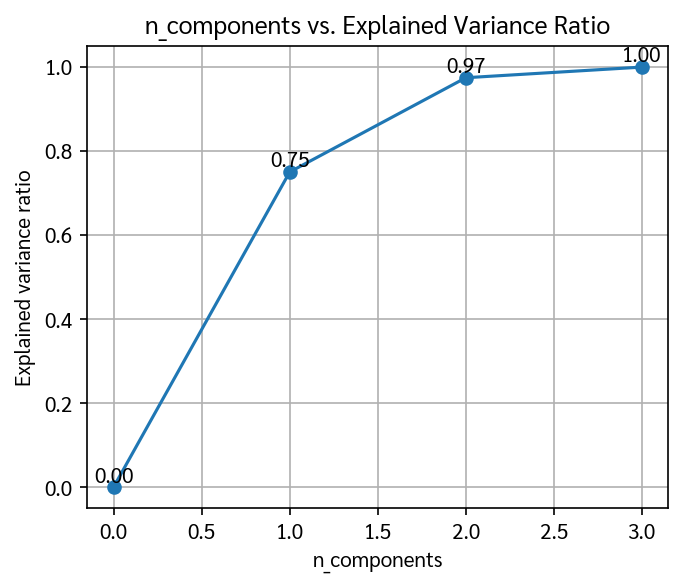

In [13]:
nums = range(4)

var_ratio = []
for num in nums:
    pca = PCA(n_components=num)
    pca.fit(X_scaled)
    var_ratio.append(np.sum(pca.explained_variance_ratio_))

plt.figure(figsize=(5, 4), dpi=150)
plt.grid()
plt.plot(nums, var_ratio, marker='o')

# Annotate each point with its value
for i, txt in enumerate(var_ratio):
    plt.text(nums[i], var_ratio[i], f'{txt:.2f}', ha='center', va='bottom')

plt.xlabel('n_components')
plt.ylabel('Explained variance ratio')
plt.title('n_components vs. Explained Variance Ratio')

plt.show()